# Data Divas Progress Report

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tabulate import tabulate

## Base Data Cleaning

In [2]:
mat_df = pd.read_csv('./student-mat.csv', sep=';')
por_df = pd.read_csv('./student-por.csv', sep=';')

por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
mat_df.insert(1, 'class', 'mat')
por_df.insert(1, 'class', 'por')
df = pd.concat([mat_df, por_df], axis=0)

In [4]:
df.drop(['G1', 'G2'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   class       1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery  

## 2.1 Data Quality Reports

In [5]:
cat_features = ['school', 'class', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
                'schoolsup' ,'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3']
cont_features = ['age', 'absences']

cat_df = df[cat_features]
cont_df = df[cont_features]

In [6]:
# Cat. Feature Data Quality Report
# Feature feature
cat_dq_report = pd.DataFrame(cat_df.columns.values)
cat_dq_report.columns = ['Feature']
cat_dq_report = cat_dq_report.reindex(columns = cat_dq_report.columns.tolist() + 
                                      ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

# Count feature
cat_dq_report['Count'] = cat_df.shape[0]

for i, feature in enumerate(cat_dq_report['Feature']):
    cat_dq_report.iloc[i:i+1, 2] = cat_df[feature].isna().sum() / cat_df.shape[0] # Miss %
    
    mode_info_df =  cat_df[feature].value_counts().reset_index()
    
    cat_dq_report.iloc[i:i+1, 3] = mode_info_df['index'].shape[0] # Card. feature
    cat_dq_report.iloc[i:i+1, 4] = mode_info_df.at[0, 'index'] # Mode
    cat_dq_report.iloc[i:i+1, 5] = mode_info_df.at[0, feature] # Mode Freq.
    cat_dq_report.iloc[i:i+1, 7] = mode_info_df.at[1, 'index'] # 2nd Mode
    cat_dq_report.iloc[i:i+1, 8] = mode_info_df.at[1, feature] # 2nd Mode Freq.

# Deriving mode % for first and second mode
cat_dq_report['Mode %'] = cat_dq_report['Mode Freq.'] / cat_dq_report['Count'] * 100
cat_dq_report['2nd Mode %'] = cat_dq_report['2nd Mode Freq.'] / cat_dq_report['Count'] * 100

cat_dq_report.head(30)

,Feature,Count,Miss %,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,school,1044,0.0,2.0,GP,772.0,73.946360,MS,272.0,26.053640
1,class,1044,0.0,2.0,por,649.0,62.164751,mat,395.0,37.835249
2,sex,1044,0.0,2.0,F,591.0,56.609195,M,453.0,43.390805
3,address,1044,0.0,2.0,U,759.0,72.701149,R,285.0,27.298851
4,famsize,1044,0.0,2.0,GT3,738.0,70.689655,LE3,306.0,29.310345
5,Pstatus,1044,0.0,2.0,T,923.0,88.409962,A,121.0,11.590038
6,Medu,1044,0.0,5.0,4,306.0,29.310345,2,289.0,27.681992
7,Fedu,1044,0.0,5.0,2,324.0,31.034483,1,256.0,24.521073
8,Mjob,1044,0.0,5.0,other,399.0,38.218391,services,239.0,22.892720
9,Fjob,1044,0.0,5.0,other,584.0,55.938697,services,292.0,27.969349


In [7]:
# Cont. Feature Data Quality Report
# Feature feature
cont_dq_report = pd.DataFrame(cont_df.columns.values)
cont_dq_report.columns = ['Feature']

cont_desc = cont_df[cont_dq_report['Feature']].describe()

# Turning rows of cont_desc into columns of our data quality report
for i, row in enumerate(list(cont_desc.index.values)):
    cont_dq_report[row] = cont_desc[i:i+1][:].T.values

cont_dq_report['% Miss.'] = 0
for i, feature in enumerate(cont_dq_report['Feature']):
    cont_dq_report.iloc[i:i+1, 9] = cont_df[feature].isna().sum() / cont_df.shape[0] # Miss %

# Cardinality feature
cont_dq_report['Card.'] = df[cont_dq_report['Feature']].nunique().values

cont_dq_report = cont_dq_report[['Feature', 'count', '% Miss.', 'Card.', 'min', '25%', 'mean', '50%', '75%', 'max', 'std']]
cont_dq_report.rename({'count': 'Count', 'min': 'Min.', '25%': '1st Qrt.', 'mean': 'Mean', '50%': 'Median', '75%': '3rd Qrt.', 'max': 'Max.', 'std': 'Std. Dev.'}, axis=1, inplace=True)

cont_dq_report.head()

,Feature,Count,% Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,age,1044.0,0,8,15.0,16.0,16.726054,17.0,18.0,22.0,1.239975
1,absences,1044.0,0,35,0.0,0.0,4.434866,2.0,6.0,75.0,6.210017


## 2.1.2 Data Visualizations 

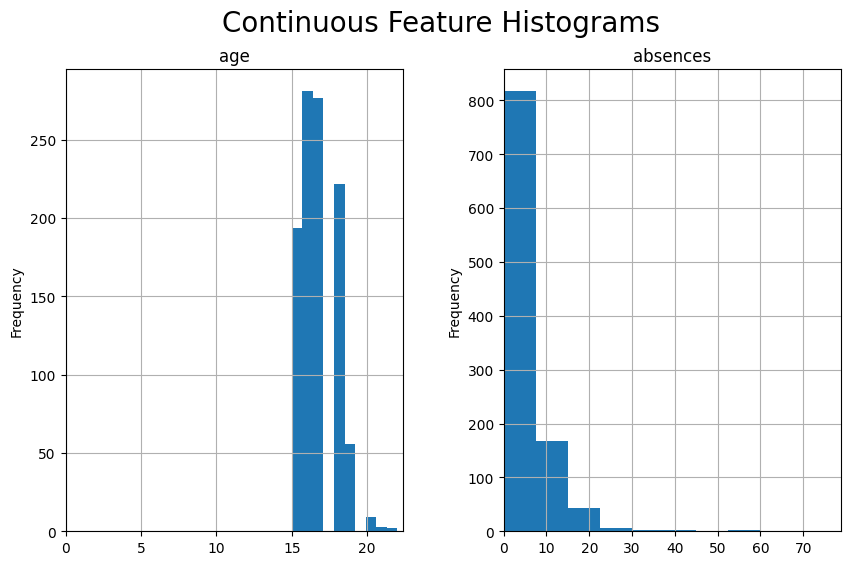

In [8]:
# Continuous Feature Histograms
fig, axes = plt.subplots(1, 2, figsize=(10,6))

fig.suptitle("Continuous Feature Histograms", fontsize=20)
for i, feature in enumerate(cont_features):
    cont_df.hist(feature, ax=axes[i])
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(xmin=0)

plt.show()

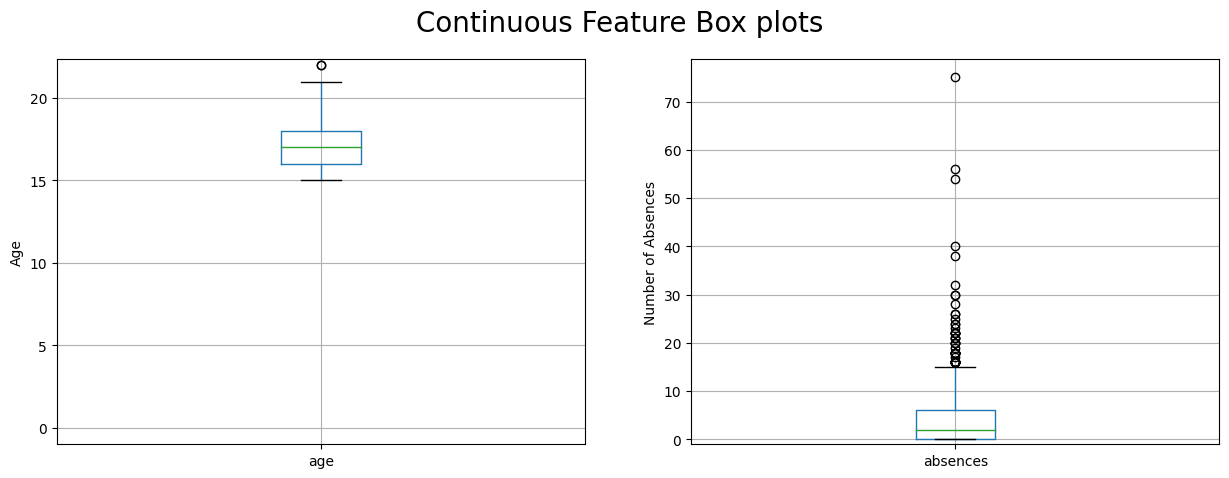

In [9]:
# Continuous Feature Box Plots
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plt.suptitle('Continuous Feature Box plots', fontsize=20)

for i, feature in enumerate(cont_features):
    cont_df.boxplot(feature, ax=axes[i])
    axes[i].set_ylim(ymin=-1)

axes[0].set_ylabel('Age')
axes[1].set_ylabel('Number of Absences')

plt.show()

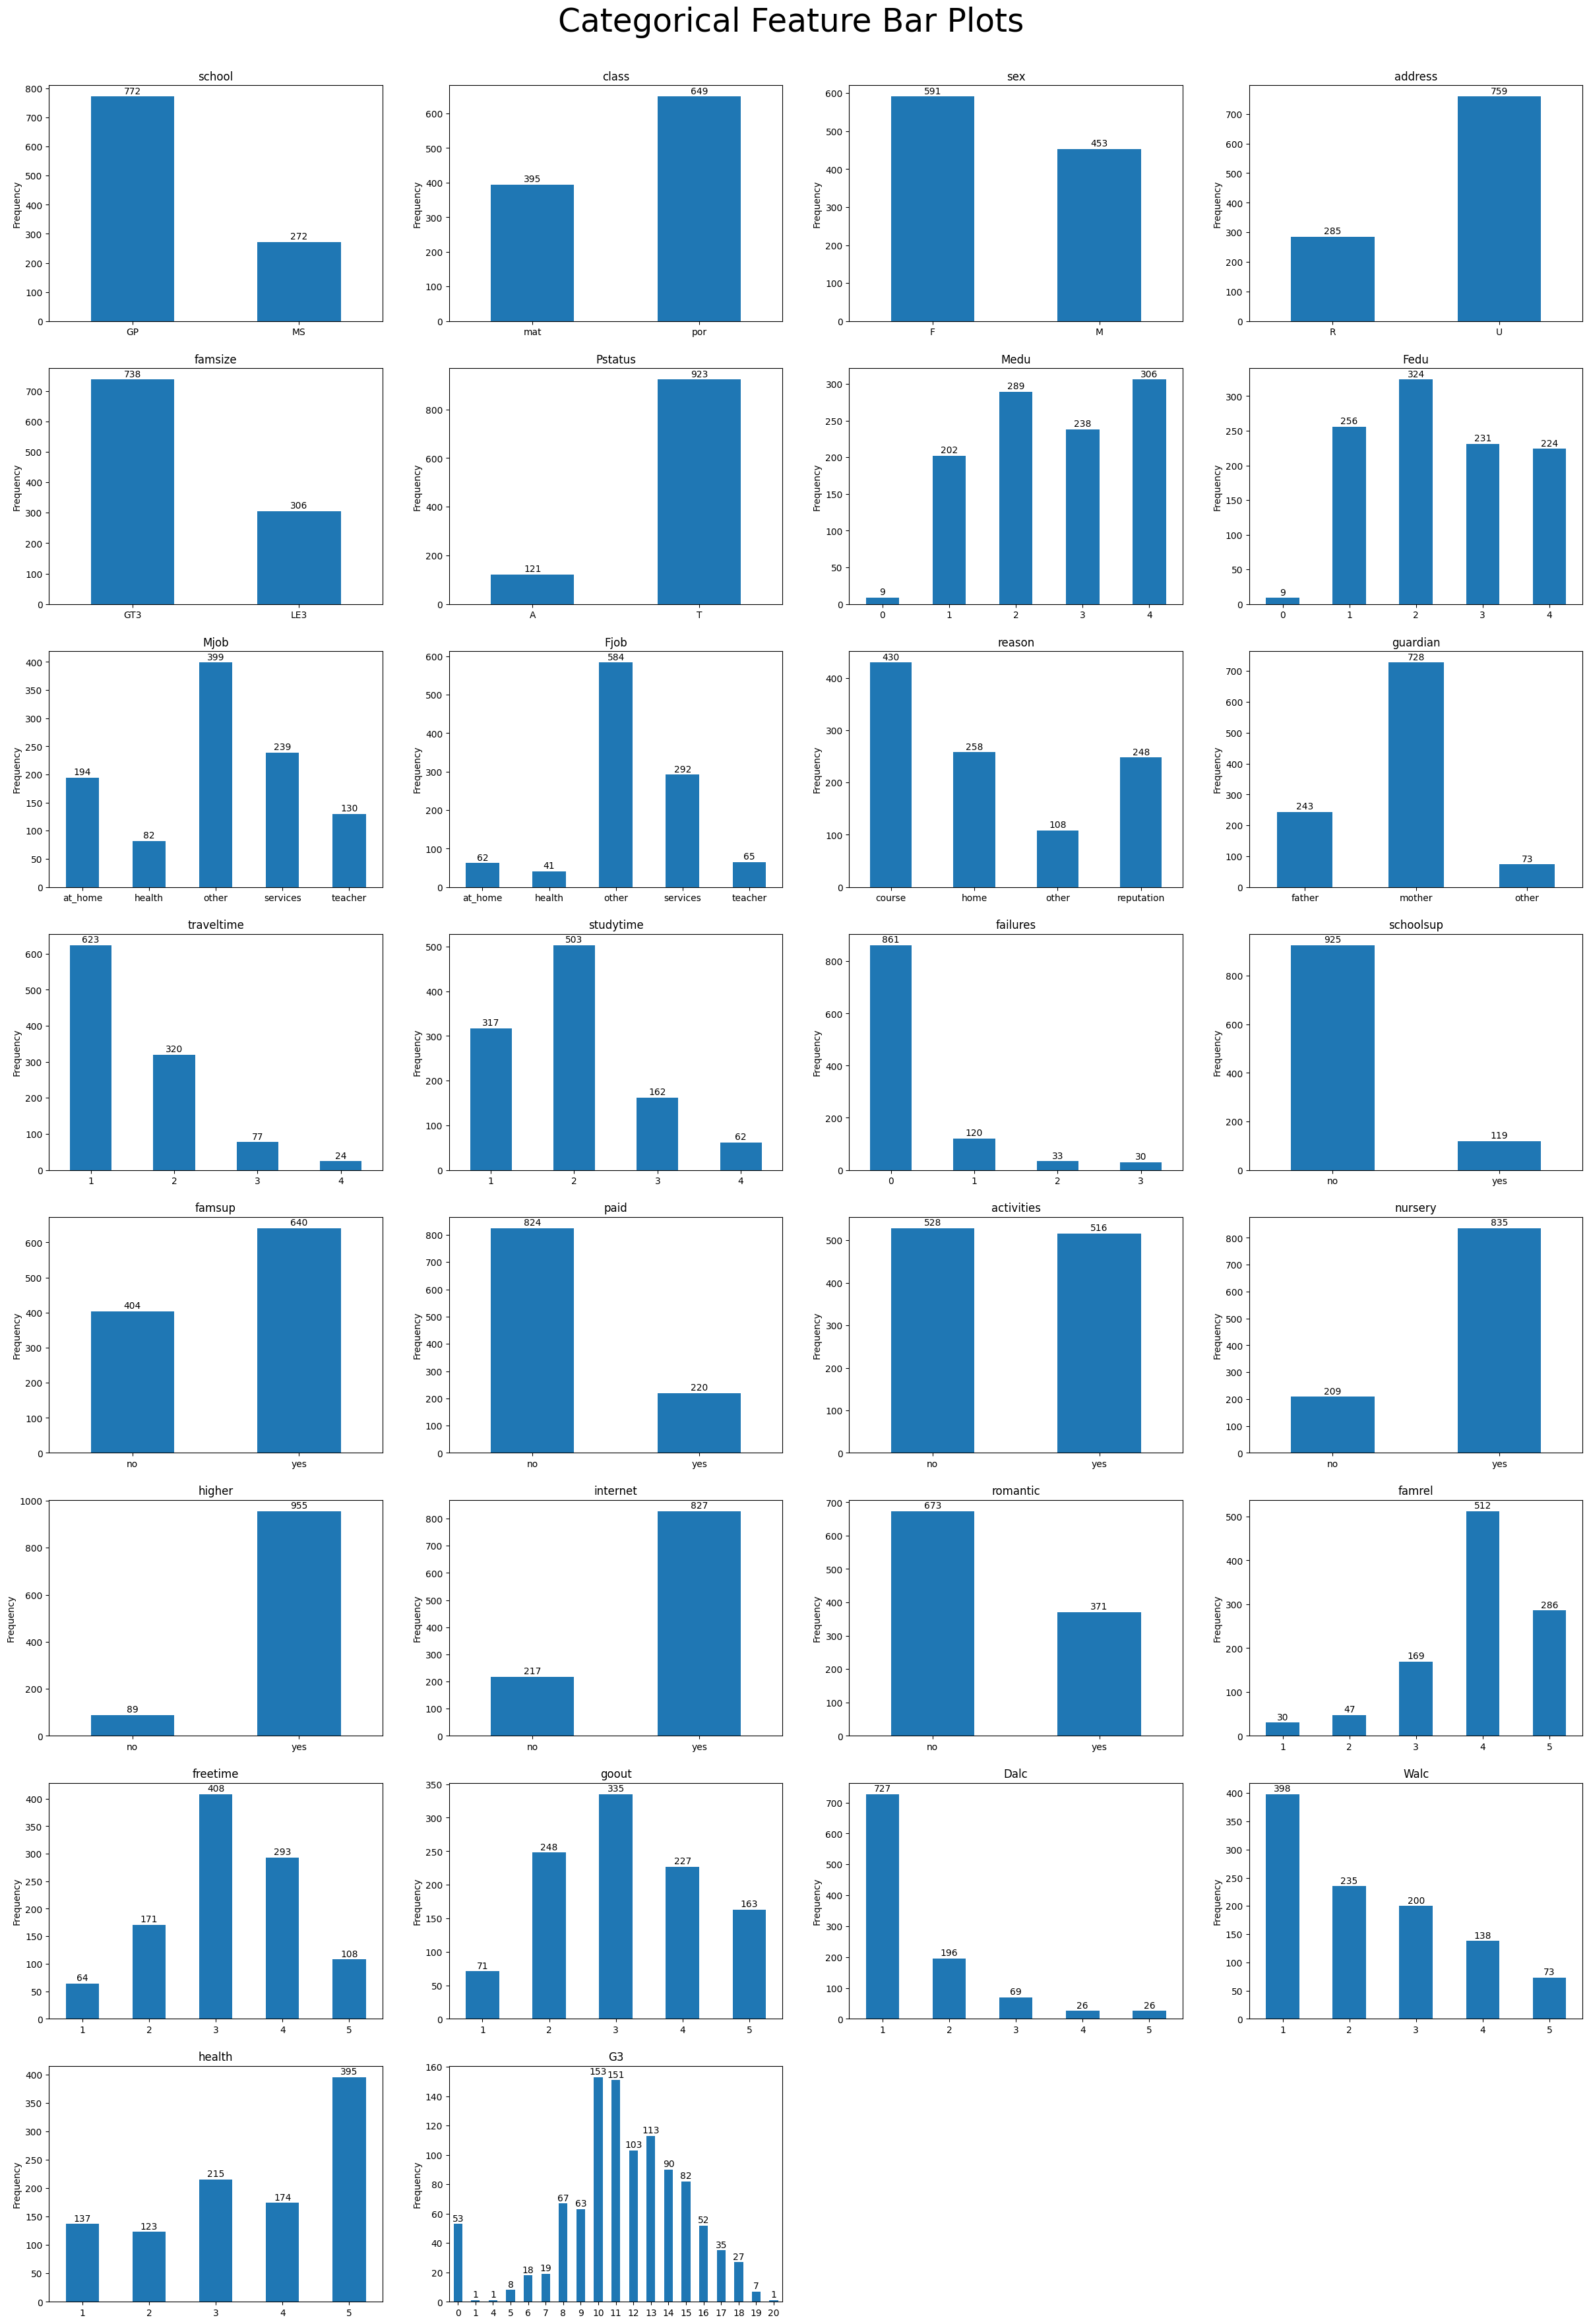

In [10]:
# Categorical Feature Bar Plots
fig = plt.figure(figsize=(30, 40))

fig.suptitle("Categorical Feature Bar Plots", fontsize=35)
# Adjusting white space under title
fig.tight_layout()
fig.subplots_adjust(top=0.95)

for i in range(1,31):
    ax = fig.add_subplot(8, 4, i)
    feature = cat_features[i-1]
    plt.title(feature)
    ax = cat_df[feature].value_counts().sort_index().plot(kind='bar') # sort_index so that ordinal values are in order
    plt.xticks(rotation=0)
    plt.ylabel('Frequency')
    # Adds frequencies above each bar
    for bar in ax.patches:
        # Get X and Y placement of label of bar
        y_val = bar.get_height()
        x_val = bar.get_x() + bar.get_width() / 2
        label = "{:.0f}".format(y_val)

        # Create annotation
        ax.annotate(label, (x_val, y_val), 
            xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')

plt.show()

## One-Hot Encoded Data

In [11]:
# one-hot encoded data: gender, ethnicity, education, lunch

one_hot_encoded_data = pd.get_dummies(df, columns = ['school', 'class', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
# print(tabulate(one_hot_encoded_data, headers = "keys", tablefmt='fancy_grid'))

print(type(one_hot_encoded_data))


<class 'pandas.core.frame.DataFrame'>


In [12]:
cat_features = set(one_hot_encoded_data.columns.to_list()).difference(set(cont_features))
cat_features = list(cat_features)


### Missing Values and Outliers

In [13]:
#Divide into a cont_dateframe and cat_dataframe

df2 = pd.DataFrame()
df3 = pd.DataFrame()
cont_features = ["age", "absences"]
df2 = one_hot_encoded_data[cont_features]

def find_outliers_IQR(df2):
    q1=df2.quantile(0.25)
    q3=df2.quantile(0.75)
    

    IQR=q3-q1
    
    outliers = df2[((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR)))]
    

    return outliers

for f in cont_features: 

    outliers = find_outliers_IQR(df2[f])
    print('****************************', f, '****************************')
    print("number of outliers: \n" + str(len(outliers)))

    print("max outlier value: \n" + str(outliers.max()))

    print("min outlier value: \n" + str(outliers.min()))


for f in cont_features:
    irq_15 = 1.5 * (one_hot_encoded_data[f].quantile(0.75) - one_hot_encoded_data[f].quantile(0.25))
    q1 = one_hot_encoded_data[f].quantile(0.25)
    q2 = one_hot_encoded_data[f].quantile(0.75)
    min_val = q1 - irq_15
    max_val = q2 + irq_15

    one_hot_encoded_data.loc[one_hot_encoded_data[f] < min_val, f] = min_val
    one_hot_encoded_data.loc[one_hot_encoded_data[f] > max_val, f] = max_val
    
    print(f, 'min: ', one_hot_encoded_data[f].min(), 'max: ', one_hot_encoded_data[f].max())

**************************** age ****************************
number of outliers: 
2
max outlier value: 
22
min outlier value: 
22
**************************** absences ****************************
number of outliers: 
54
max outlier value: 
75
min outlier value: 
16
age min:  15 max:  21
absences min:  0 max:  15


### Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

for f in cont_features:
    scaler = MinMaxScaler()
    one_hot_encoded_data[f] = scaler.fit_transform(one_hot_encoded_data[f].values.reshape(-1, 1))
    print(f, 'min: ', one_hot_encoded_data[f].min(), 'max: ', one_hot_encoded_data[f].max())


age min:  0.0 max:  1.0
absences min:  0.0 max:  1.0


In [15]:
one_hot_encoded_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,famrel,freetime,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.500000,4,4,2,2,0,yes,no,4,3,...,1,0,0,1,0,1,1,0,1,0
1,0.333333,1,1,1,2,0,no,yes,5,3,...,1,0,1,0,0,1,0,1,1,0
2,0.000000,1,1,1,2,3,yes,no,4,3,...,1,0,0,1,0,1,0,1,1,0
3,0.000000,4,2,1,3,0,no,yes,3,2,...,0,1,0,1,0,1,0,1,0,1
4,0.166667,3,3,1,2,0,no,yes,4,3,...,1,0,0,1,0,1,1,0,1,0


### Selecting Features

In [16]:
corr_arr = one_hot_encoded_data.corr()

remove_vals = corr_arr["G3"].sort_values(ascending=False)
print(remove_vals)

G3                   1.000000
higher_yes           0.236578
Medu                 0.201472
class_por            0.187166
studytime            0.161629
Fedu                 0.159796
school_GP            0.127114
reason_reputation    0.121303
address_U            0.117696
internet_yes         0.107064
Fjob_teacher         0.101361
Mjob_health          0.101349
romantic_no          0.098363
Mjob_teacher         0.084521
famsize_LE3          0.061209
famrel               0.054461
paid_no              0.049388
Mjob_services        0.045015
guardian_father      0.042778
Fjob_health          0.042101
nursery_yes          0.039950
activities_yes       0.033998
sex_F                0.031472
Pstatus_A            0.030693
guardian_mother      0.009746
reason_home          0.003895
Fjob_at_home        -0.021194
Fjob_other          -0.023825
Pstatus_T           -0.030693
sex_M               -0.031472
activities_no       -0.033998
absences            -0.034156
Fjob_services       -0.035273
nursery_no

In [17]:
#print all values with less than +/- 0.1 correlation
remove_vals = remove_vals[remove_vals < 0.1]
remove_vals = remove_vals[remove_vals > -0.1]

keep_vals = set(one_hot_encoded_data.columns.to_list()).difference(set(remove_vals.index.to_list()))
keep_vals = list(keep_vals)

print("features removed:", len(remove_vals.index.to_list()))
print(remove_vals.index.to_list())

print("\n\nfeatures left:", len(one_hot_encoded_data.columns) - len(remove_vals))
print(keep_vals)

features removed: 32
['romantic_no', 'Mjob_teacher', 'famsize_LE3', 'famrel', 'paid_no', 'Mjob_services', 'guardian_father', 'Fjob_health', 'nursery_yes', 'activities_yes', 'sex_F', 'Pstatus_A', 'guardian_mother', 'reason_home', 'Fjob_at_home', 'Fjob_other', 'Pstatus_T', 'sex_M', 'activities_no', 'absences', 'Fjob_services', 'nursery_no', 'reason_other', 'paid_yes', 'famsize_GT3', 'freetime', 'Mjob_other', 'health', 'reason_course', 'guardian_other', 'goout', 'romantic_yes']


features left: 25
['address_R', 'higher_no', 'Mjob_at_home', 'higher_yes', 'Dalc', 'G3', 'internet_yes', 'traveltime', 'failures', 'class_por', 'schoolsup', 'school_MS', 'age', 'studytime', 'Mjob_health', 'address_U', 'reason_reputation', 'class_mat', 'famsup', 'Walc', 'internet_no', 'Medu', 'Fjob_teacher', 'school_GP', 'Fedu']


In [18]:
binary1 = pd.get_dummies(one_hot_encoded_data[keep_vals])
binary1.to_csv('final_data.csv')

display (binary1)


,address_R,higher_no,Mjob_at_home,higher_yes,Dalc,G3,internet_yes,traveltime,failures,class_por,...,Walc,internet_no,Medu,Fjob_teacher,school_GP,Fedu,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes
0,0,0,1,1,1,6,0,2,0,0,...,1,1,4,1,1,4,0,1,1,0
1,0,0,1,1,1,6,1,1,0,0,...,1,0,1,0,1,1,1,0,0,1
2,0,0,1,1,2,10,1,1,3,0,...,3,0,1,0,1,1,0,1,1,0
3,0,0,0,1,1,15,1,1,0,0,...,1,0,4,0,1,2,1,0,0,1
4,0,0,0,1,1,10,0,1,0,0,...,2,1,3,0,1,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0,1,1,10,1,1,1,1,...,2,0,2,0,0,3,1,0,1,0
645,0,0,0,1,1,16,1,1,0,1,...,1,0,3,0,0,1,1,0,0,1
646,0,0,0,1,1,9,0,2,0,1,...,1,1,1,0,0,1,1,0,1,0
647,0,0,0,1,3,10,1,2,0,1,...,4,0,3,0,0,1,1,0,1,0
